# Tolerance Stackup using Monte Carlo Simulation

A Monte Carlo simulation replaces a fixed model parameter with a random variable from a probability distribution (the normal distribution is common). Including this uncertainty in the model enables us to measure the uncertainty or risk in the output.

The aim of this project is to use a Monte Carlo simulation to perform tolerance analysis for a simple mechanical assembly. While RSS is a common tolerance analysis method, Monte Carlo can be a more powerful method because it does not require a normal distribution assumption for component tolerances.


In [57]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()

## Problem Setup

This example looks at a simple stepped shaft with two discrete sections. The lengths of the first and second sections are 1.000" +/- 0.005" and 1.500" +0.005", -0" respectively. Assume that the first section length tolerance can be modeled by a normal distribution with standard deviation of 0.002, and the second section length tolerance is modeled by a _uniform distribution_.

**Question:** What is the expected overall length of the part?


## Monte Carlo Simulation

Let's start by summarizing the data into arrays.


In [58]:
length = [1, 1.5]
std = [0.002, None]
limits = [[-0.005, 0.005], [0, 0.005]]

In [59]:
samples = 10000
stackup = np.random.default_rng(seed=42).normal(
    length[0], std[0], samples)

And let's look at the distribution of the lengths for section 1.


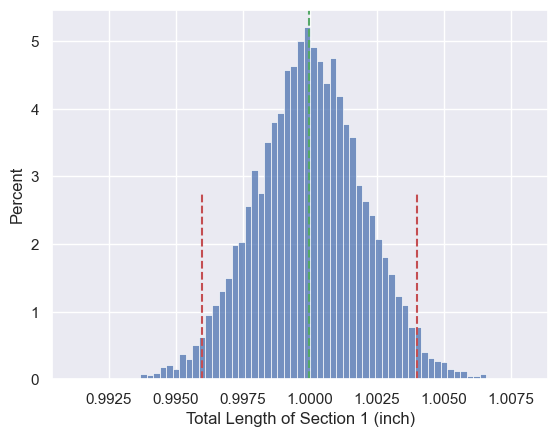

95% Confidence Interval:
Lower limit: 0.9960
Upper limit: 1.0040
Mean: 1.0000


In [60]:
mean_dist = np.mean(stackup)
std_dist = np.std(stackup)

# 95% confidence interval
lower_95 = mean_dist - 2 * std_dist
upper_95 = mean_dist + 2 * std_dist

sns.histplot(data=stackup, stat='percent')
plt.xlabel('Total Length of Section 1 (inch)')
plt.axvline(lower_95, 0, 0.5, c='r', linestyle='--')
plt.axvline(upper_95, 0, 0.5, c='r', linestyle='--')
plt.axvline(mean_dist, 0, 1, c='g', linestyle='--')
plt.show()

print('95% Confidence Interval:')
print(f'Lower limit: {lower_95:.4f}')
print(f'Upper limit: {upper_95:.4f}')
print(f'Mean: {mean_dist:.4f}')

And we'll do the same for section 2.


In [61]:
samples = 10000
stackup = np.random.default_rng(seed=42).uniform(
    length[1] + limits[1][0], length[1] + limits[1][1], samples)

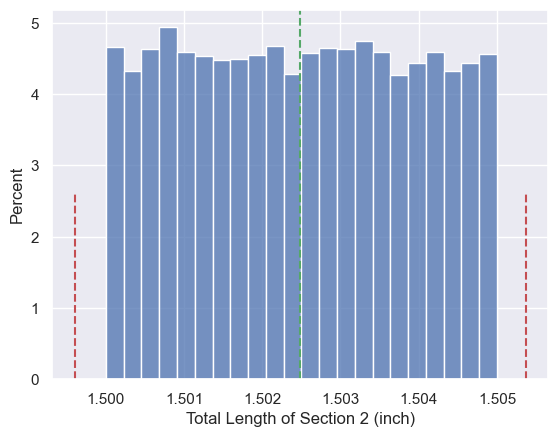

95% Confidence Interval:
Lower limit: 1.4996
Upper limit: 1.5054
Mean: 1.5025


In [62]:
mean_dist = np.mean(stackup)
std_dist = np.std(stackup)

# 95% confidence interval
lower_95 = mean_dist - 2 * std_dist
upper_95 = mean_dist + 2 * std_dist

sns.histplot(data=stackup, stat='percent')
plt.xlabel('Total Length of Section 2 (inch)')
plt.axvline(lower_95, 0, 0.5, c='r', linestyle='--')
plt.axvline(upper_95, 0, 0.5, c='r', linestyle='--')
plt.axvline(mean_dist, 0, 1, c='g', linestyle='--')
plt.show()

print('95% Confidence Interval:')
print(f'Lower limit: {lower_95:.4f}')
print(f'Upper limit: {upper_95:.4f}')
print(f'Mean: {mean_dist:.4f}')

Now let's perform the tolerance analysis across both sections.


In [63]:
samples = 10000
stackup = [np.random.default_rng(seed=42).normal(
    length[0], std[0], samples),
    np.random.default_rng(seed=42).uniform(
    length[1] + limits[1][0], length[1] + limits[1][1], samples)]

total_length = np.sum(stackup, axis=0)

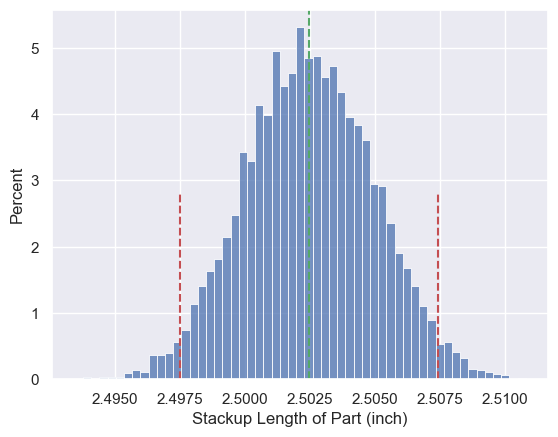

95% Confidence Interval:
Lower limit: 2.4975
Upper limit: 2.5074
Mean: 2.5025


In [64]:
mean_dist = np.mean(total_length)
std_dist = np.std(total_length)

# 95% confidence interval
lower_95 = mean_dist - 2 * std_dist
upper_95 = mean_dist + 2 * std_dist

sns.histplot(data=total_length, stat='percent')
plt.xlabel('Stackup Length of Part (inch)')
plt.axvline(lower_95, 0, 0.5, c='r', linestyle='--')
plt.axvline(upper_95, 0, 0.5, c='r', linestyle='--')
plt.axvline(mean_dist, 0, 1, c='g', linestyle='--')
plt.show()

print('95% Confidence Interval:')
print(f'Lower limit: {lower_95:.4f}')
print(f'Upper limit: {upper_95:.4f}')
print(f'Mean: {mean_dist:.4f}')

Here the Monte Carlo method is able to easily account for non-normal distributions in computing overall tolerance stackups.
